#Import

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import string
import itertools

from keras import models
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Create variables

Create paths for dataset and models.

In [113]:
data_path = '/content/drive/MyDrive/Universidad/Deep_Learning/2nd_Midterm/dataset_predict'

root_path = '/content/drive/MyDrive/Universidad/Deep_Learning/Final_Project'

data_path = root_path + '/Dataset'
test_path = data_path + '/Test'

model_TL_path = root_path + '/keras-models' + '/TL_Model.h5'
model_STL_path = root_path + '/keras-models' + '/STL_Model.h5'

Create dictionaries to point to solutions according to the model prediction.

In [114]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
print(classes, end = " ")

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'] 

#Load models

Load trained models.

In [115]:
model_TL = models.load_model(model_TL_path)
model_STL = models.load_model(model_STL_path)

#Create Confussion matrix

In [116]:
def pred(img_path,model,classes):
  img = image.load_img(img_path, target_size=(32, 32))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  prediction = model.predict(img_batch)
  index = np.where(prediction[0] == np.amax(prediction[0]))
  key = index[0][0]
  guess = classes[key]
  return guess

In [117]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues,
                        plot_size_x=6.4,
                        plot_size_y=6.4):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams["figure.figsize"] = (plot_size_x,plot_size_y)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [118]:
y_true_TL=[]
y_pred_TL=[]
y_true_STL=[]
y_pred_STL=[]
for letter in classes:
  directory = test_path+'/'+letter
  print(letter)
  for filename in os.listdir(directory):
      y_true_TL.append(letter)
      y_true_STL.append(letter)
      f = os.path.join(directory, filename)
      # checking if it is a file
      if os.path.isfile(f):
          y_pred_TL.append(pred(f,model_TL,classes))
          y_pred_STL.append(pred(f,model_STL,classes))

A
B
C
D
E
F
G
H
I
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y


In [119]:
cm_STL = confusion_matrix(y_true=y_true_STL, y_pred=y_pred_STL)
print(cm_STL)

[[267   0   0   0   0   0  64   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [357   0   0   0   0   0  74   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0]
 [ 94   0   0   0   0   0 215   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0]
 [172   0   0   0   0   0  73   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [259   0   0   0   0   0 239   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [ 88   0   0   0   0   0 156   0   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   0]
 [155   0   0   0   0   0 185   0   0   0   0   0   0   0   8   0   0   0
    0   0   0   0   0   0]
 [204   0   0   0   0   0 224   0   0   0   0   0   0   0   8   0   0   0
    0   0   0   0   0   0]
 [142   0   0   0   0   0 146   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [272   0   0   0   0   0  59   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0

In [120]:
print(classification_report(y_true_STL, y_pred_STL, target_names=classes))

              precision    recall  f1-score   support

           A       0.07      0.81      0.12       331
           B       0.00      0.00      0.00       432
           C       0.00      0.00      0.00       310
           D       0.00      0.00      0.00       245
           E       0.00      0.00      0.00       498
           F       0.00      0.00      0.00       247
           G       0.06      0.53      0.11       348
           H       0.00      0.00      0.00       436
           I       0.00      0.00      0.00       288
           K       0.00      0.00      0.00       331
           L       1.00      0.00      0.01       209
           M       0.00      0.00      0.00       394
           N       0.00      0.00      0.00       291
           O       0.00      0.00      0.00       246
           P       0.34      0.05      0.08       347
           Q       0.00      0.00      0.00       164
           R       0.00      0.00      0.00       144
           S       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization


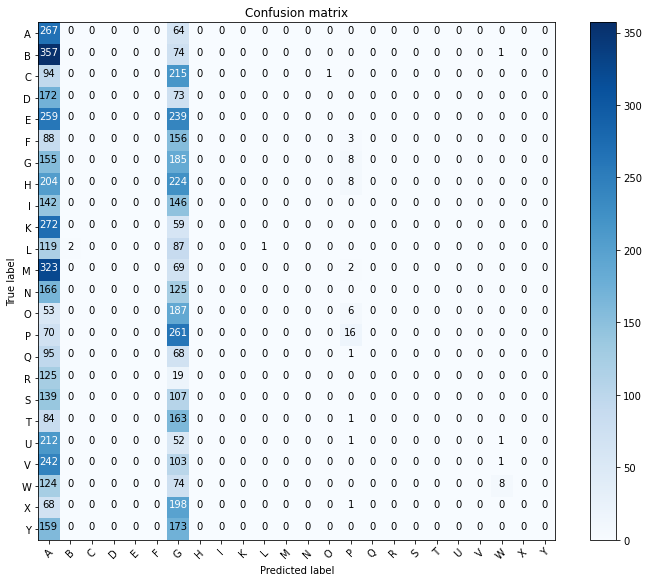

In [121]:
plot_confusion_matrix(cm_STL,classes,plot_size_x=10,plot_size_y=8)

In [122]:
cm_TL = confusion_matrix(y_true=y_true_TL, y_pred=y_pred_TL)
print(cm_TL)

[[ 15   1   0   1   9   0   0   1   0   0   0  13  52 186  23   0  14   2
    0   0   0   0  14   0]
 [ 11   2   3   0  15   0   5   0   1   0   0   4  12 311   3   0  32   1
    1   4   0   2  24   1]
 [  2   2   4   0  18   0   3   1  11   0   0  63  48  96   0   0  37   1
    0  10   0   4  10   0]
 [  2  13   7   1   3   0   1   0   0   0   0  11  19 111   0   0  21   0
    0   5   0   1  50   0]
 [  7   0   4   0  23   0   0   1  15   0   0  48  27 337   1   0  19   6
    0   1   0   0   9   0]
 [  0   3   6   0  14   0   0   0   2   0   0  21  36 122   3   0  21   2
    0   1   0   3  12   1]
 [  4   0   7   0   0   0   2   1   0   0   0  48  53 147   0   0  15   2
    0   0   0   0  69   0]
 [  1   0   9   0   5   0   1   0   7   0   0  74  33 192   0   0  44   0
    0   0   0   0  70   0]
 [  3   2   8   1   5   0   0   0   4   0   0  24  37 145   1   0  11   4
    0   1   0   0  41   1]
 [  4  10   0   0   7   0   0   1   2   0   0  23  18 204   2   0  19   1
    0   6   0   1

In [123]:
print(classification_report(y_true_TL, y_pred_TL, target_names=classes))

              precision    recall  f1-score   support

           A       0.17      0.05      0.07       331
           B       0.04      0.00      0.01       432
           C       0.03      0.01      0.02       310
           D       0.12      0.00      0.01       245
           E       0.13      0.05      0.07       498
           F       0.00      0.00      0.00       247
           G       0.06      0.01      0.01       348
           H       0.00      0.00      0.00       436
           I       0.05      0.01      0.02       288
           K       0.00      0.00      0.00       331
           L       0.00      0.00      0.00       209
           M       0.04      0.07      0.05       394
           N       0.06      0.14      0.08       291
           O       0.03      0.49      0.06       246
           P       0.00      0.00      0.00       347
           Q       0.00      0.00      0.00       164
           R       0.06      0.18      0.09       144
           S       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix, without normalization


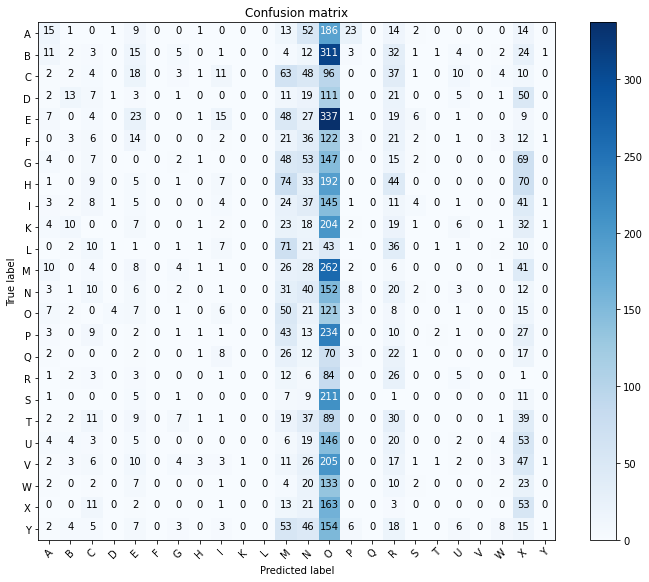

In [124]:
plot_confusion_matrix(cm_TL,classes,plot_size_x=10,plot_size_y=8)